# Project: Investigate a European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#Acknowledgement"> Hat Tip Acknowledgement</a></li> 
</ul>

<a id='intro'></a>
## Introduction

I investigate European Soccer Database. The database consists of seven tables namely 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match'. Briefly, the dataset contains useful statistics about 11 different European Leagues between 2008 and 2016. The database piques my interest in practicing what I have learned so far. The original source of the database can be found on Kaggle. You should download it before data wrangling.

#### Questions To Investigate

- <a href="#Q1"> Who are top 10 players that had most penalties?</a>
- <a href ="#Q2">Who are the top 10 players with highest averaged overall ratings for time period 2008-2016?</a>
- <a href ="#Q3">What team attributes lead to most victories?</a>
- <a href ="#Q5">How has goal difference changed over time for each team?</a>
- <a href ="#Q6">How does Age of players correlate with Stamina, Reactions, Agility, Sprint Speed & Acceleration?</a>
- <a href ="#Q7">How players attributes such as Overall Rating ,Dribbling ,Short Passing,Long Passing,Ball Control ,Potential are related?(for this comparision is done)</a>
- <a href ="#Q8">Which foot is the most preferred foot among the players?</a>
- <a href ="#Q9">Which league sees the highest numbers of goals per game on average? And how does the value change across seasons?</a>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


To start off the analysis, we need to import the right classes into our Jupyter notebook.I also used SQLite and exported the CSV file to read in here. Most data aggregation has been performed in SQLITE with queries included below. 
The Pandas Library in python allows us to properly read and start analyzing the dataset.
The query used to extract the data and export it into csv.

- *Query To Extract Player Penalty Rating (exported to:player_pen_rating.csv)*

**SELECT
  Player.player_api_id AS PLAYER_CODE,
  Player.player_name AS PLAYER_NAME,
  SUM(Player_Attributes.penalties) AS TOTAL_PENALTIES,
  AVG(Player_Attributes.overall_rating) AS AVERAGE_OVERALL_RATING
FROM Player_Attributes
JOIN Player
ON player.player_api_id = Player_Attributes.player_api_id
GROUP BY 1;**

- *Query To Count Team Winning(exported to:team_win_count.csv) *

**CREATE TABLE Winning_Team AS
SELECT CASE WHEN match.home_team_goal > match.away_team_goal THEN HTeam.team_api_id
            ELSE ATeam.team_api_id END AS winning_team_id,
COUNT(1) AS Tot_win_count
FROM match
JOIN Team AS HTeam on HTeam.team_api_id = match.home_team_api_id
JOIN Team AS ATeam on ATeam.team_api_id = Match.away_team_api_id
GROUP BY 1;**

**SELECT
  Team.team_api_id AS TEAM_CODE,
  Team.team_long_name AS TEAM_FULL_NAME,
  AVG(Team_Attributes.buildUpPlayDribbling) AS AVERAGE_BUILDUP_PLAY_DRIBBLING,
  AVG(Team_Attributes.buildUpPlayPassing) AS AVERAGE_BUILDUP_PLAY_PASSING,
  AVG(Team_Attributes.buildUpPlaySpeed) AS AVERAGE_BUILDUP_PLAY_SPEED,
  AVG(Team_Attributes.chanceCreationCrossing) AS AVERAGE_CHANCE_CREATION_CROSSING,
  AVG(Team_Attributes.chanceCreationPassing) AS AVERAGE_CHANCE_CREATION_PASSING,
  AVG(Team_Attributes.chanceCreationShooting) AS AVERAGE_CHANCE_CREATION_SHOOTING,
  AVG(Team_Attributes.defenceAggression) AS AVERAGE_DEFENCE_AGGRESSION,
  AVG(Team_Attributes.defencePressure) AS AVERAGE_DEFENCE_PRESSURE,
  AVG(Team_Attributes.defenceTeamWidth) AS AVERAGE_DEFENCE_TEAM_WIDTH,
  Winning_Team.Tot_win_count AS TOTAL_WIN_COUNT
FROM Team
JOIN Team_Attributes
  ON Team.team_api_id = Team_Attributes.team_api_id
JOIN Winning_Team
  ON Team.team_api_id = Winning_Team.winning_team_id
GROUP BY 1;**
         
- *Query to evaluate Country Match Goal(exported to:country_match_goal.csv) *

**SELECT
  Country.name AS COUNTRY_NAME,
  Strftime('%Y', Match.date) AS YEAR_OF_MATCH,
  home_team_goal AS HOME_TEAM_GOAL,
  away_team_goal AS AWAY_TEAM_GOAL
FROM Match
LEFT JOIN Country
  ON match.country_id = Country.id;**
 
 - *Query to evaluate age and players attribute correlation( exported to: player_attri_correlation.csv)*
 
 **SELECT
  pa.date AS DATE,
  p.birthday AS BIRTHDAY,
  p.player_api_id AS PLAYER_API_ID,
  p.player_name AS PLAYER_NAME,
  AVG(pa.reactions) AS AVERAGE_REACTIONS,
  AVG(pa.stamina) AS AVERAGE_STAMINA,
  AVG(pa.acceleration) AS AVERAGE_ACCELERATION,
  AVG(pa.sprint_speed) AS AVERAGE_SPRINT_SPEED,
  AVG(pa.agility) AS AVERAGE_AGILITY,
FROM Player_Attributes pa
JOIN Player p
  ON p.player_api_id = pa.player_api_id
GROUP BY 1
ORDER BY 1**

- *Query to know Overall vs attributes(exported to: overallvspattribute.csv)*

**SELECT
  overall_rating AS OVERALL_RATING,
  potential AS POTENTIAL,
  dribbling AS DRIBBLING,
  short_passing AS SHORT_PASSING,
  long_passing AS LONG_PASSING,
  ball_control AS BALL_CONTROL
FROM Player_Attributes
ORDER BY 1**

- *Query to evaluate what foot players preferred the most( exported to : preferred_foot_players.csv)*

**SELECT
  preferred_foot AS PREFERRED_FOOT,
  COUNT(*) AS NUMBER_OF_PLAYERS
FROM Player_Attributes
GROUP BY 1;**

- *Query to calculate league goals info accross seasons(exported to: league_goal_info.csv)*

**SELECT
  season AS SEASON,
  home_team_goal AS HOME_TEAM_GOAL,
  away_team_goal AS AWAY_TEAM_GOAL,
  name AS LEAGUE_NAME,
  match_api_id AS MATCH_API_ID
FROM match m
JOIN league l
  ON m.league_id = l.id;**
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#connect connect connect let python meet SQL



In [3]:
#read team attribute and wincount data and inspect data 
df_team_attri_win = pd.read_csv('team_win_count.csv')
print(df_team_attri_win.shape)
print('_________'*10)
print(df_team_attri_win.info())
print('_________'*10)
print(df_team_attri_win.isnull().sum(axis=0))

(288, 12)
__________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 12 columns):
TEAM_CODE                           288 non-null int64
TEAM_FULL_NAME                      288 non-null object
AVERAGE_BUILDUP_PLAY_DRIBBLING      262 non-null float64
AVERAGE_BUILDUP_PLAY_PASSING        288 non-null float64
AVERAGE_BUILDUP_PLAY_SPEED          288 non-null float64
AVERAGE_CHANCE_CREATION_CROSSING    288 non-null float64
AVERAGE_CHANCE_CREATION_PASSING     288 non-null float64
AVERAGE_CHANCE_CREATION_SHOOTING    288 non-null float64
AVERAGE_DEFENCE_AGGRESSION          288 non-null float64
AVERAGE_DEFENCE_PRESSURE            288 non-null float64
AVERAGE_DEFENCE_TEAM_WIDTH          288 non-null float64
TOTAL_WIN_COUNT                     288 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 27.1+ KB
None
_______________________________________________

In [4]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_players_penalty_stats = pd.read_csv('player_pen_rating.csv')
df_players_penalty_stats.info()
print('-'*100)
print(df_players_penalty_stats.describe())
print('-'*100)
print(df_players_penalty_stats.isnull().sum(axis=0))
print('-'*100)
df_players_penalty_stats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 4 columns):
PLAYER_CODE               11060 non-null int64
PLAYER_NAME               11060 non-null object
TOTAL_PENALTIES           11060 non-null int64
AVERAGE_OVERALL_RATING    11060 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 345.7+ KB
----------------------------------------------------------------------------------------------------
         PLAYER_CODE  TOTAL_PENALTIES  AVERAGE_OVERALL_RATING
count   11060.000000     11060.000000            11060.000000
mean   156582.427215       910.808318               66.821220
std    160713.700624       625.822260                6.237737
min      2625.000000        20.000000               43.000000
25%     35555.500000       416.000000               62.822193
50%     96619.500000       766.000000               66.722222
75%    212470.500000      1280.000000               70.951630
max    750584.000000      4314.000000   

,PLAYER_CODE,PLAYER_NAME,TOTAL_PENALTIES,AVERAGE_OVERALL_RATING
0,2625,"Patryk Rachwal,18",867,60.142857
1,2752,Diego Mainz,744,69.380952
2,2768,Jose Dorado,670,69.285714
3,2770,Ignacio Gonzalez,959,71.133333
4,2790,Alberto Rey,277,70.200000


In [5]:
#read match wins aggregate data and inspect data
df_match_goals_country = pd.read_csv('country_match_goal.csv')
print(df_match_goals_country.shape)
print(50*'-')
print(df_match_goals_country.info())
print(50*'-')
print(df_match_goals_country.isnull().sum(axis=0))
print(50*'-')
print(df_match_goals_country.head(5))

(25979, 4)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 4 columns):
COUNTRY_NAME      25979 non-null object
YEAR_OF_MATCH     25979 non-null int64
HOME_TEAM_GOAL    25979 non-null int64
AWAY_TEAM_GOAL    25979 non-null int64
dtypes: int64(3), object(1)
memory usage: 811.9+ KB
None
--------------------------------------------------
COUNTRY_NAME      0
YEAR_OF_MATCH     0
HOME_TEAM_GOAL    0
AWAY_TEAM_GOAL    0
dtype: int64
--------------------------------------------------
  COUNTRY_NAME  YEAR_OF_MATCH  HOME_TEAM_GOAL  AWAY_TEAM_GOAL
0      Belgium           2008               1               1
1      Belgium           2008               0               0
2      Belgium           2008               0               3
3      Belgium           2008               5               0
4      Belgium           2008               1               3


<div class ="alert alert-block alert-warning">
<b> Great, no missing data. Let's proceed with analysis.No need to clean any data. </b> 
</div>

In [6]:
df_correlation_factors=pd.read_csv('player_attri_correlation.csv')
print(df_correlation_factors.shape)
print(50*'-')
print(df_correlation_factors.info())
print(50*'-')
print(df_correlation_factors.isnull().sum(axis=0))
print(50*'-')
print(df_correlation_factors.head(5))

(197, 9)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
DATE                    197 non-null object
BIRTHDAY                197 non-null object
PLAYER_API_ID           197 non-null int64
PLAYER_NAME             197 non-null object
AVERAGE_REACTIONS       197 non-null float64
AVERAGE_STAMINA         197 non-null float64
AVERAGE_ACCELERATION    197 non-null float64
AVERAGE_SPRINT_SPEED    197 non-null float64
AVERAGE_AGILITY         197 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 13.9+ KB
None
--------------------------------------------------
DATE                    0
BIRTHDAY                0
PLAYER_API_ID           0
PLAYER_NAME             0
AVERAGE_REACTIONS       0
AVERAGE_STAMINA         0
AVERAGE_ACCELERATION    0
AVERAGE_SPRINT_SPEED    0
AVERAGE_AGILITY         0
dtype: int64
--------------------------------------------------
                  D

In [7]:
df_overall_vs_relattributes=pd.read_csv('overallvspattribute.csv')

In [8]:
df_preferred_foot_players=pd.read_csv('preferred_foot_players.csv')
print(df_preferred_foot_players.shape)
print(50*'-')
print(df_preferred_foot_players.info())
print(50*'-')
print(df_preferred_foot_players.isnull().sum(axis=0))
print(50*'-')
print(df_preferred_foot_players.head(5))


(3, 2)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
PREFERRED_FOOT       2 non-null object
NUMBER_OF_PLAYERS    3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes
None
--------------------------------------------------
PREFERRED_FOOT       1
NUMBER_OF_PLAYERS    0
dtype: int64
--------------------------------------------------
  PREFERRED_FOOT  NUMBER_OF_PLAYERS
0            NaN                836
1           left              44733
2          right             138409


<div class ="alert alert-block alert-warning">
<b>Here ,we can find NaN .So we need to perfom the data cleaning by dropping them. </b> 
</div>

In [9]:
df_match_league = pd.read_csv('league_goal_info.csv')
df_match_league.head()

,SEASON,HOME_TEAM_GOAL,AWAY_TEAM_GOAL,LEAGUE_NAME,MATCH_API_ID
0,2008/2009,1,1,Belgium Jupiler League,492473
1,2008/2009,0,0,Belgium Jupiler League,492474
2,2008/2009,0,3,Belgium Jupiler League,492475
3,2008/2009,5,0,Belgium Jupiler League,492476
4,2008/2009,1,3,Belgium Jupiler League,492477


<div class ="alert alert-block alert-warning"> <b>The only reason why I need the match_api_id column as well, is to check if there are duplicate rows or duplicate matches present. In that case, I'll have to discard them.</b>
</div>

In [10]:
df_match_league.info()
df_match_league.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
SEASON            25979 non-null object
HOME_TEAM_GOAL    25979 non-null int64
AWAY_TEAM_GOAL    25979 non-null int64
LEAGUE_NAME       25979 non-null object
MATCH_API_ID      25979 non-null int64
dtypes: int64(3), object(2)
memory usage: 1014.9+ KB


SEASON                8
HOME_TEAM_GOAL       11
AWAY_TEAM_GOAL       10
LEAGUE_NAME          11
MATCH_API_ID      25979
dtype: int64

<div class="alert alert-block alert-success">
<b>Perfect. no empty cells and all the matches are unique.</b>
</div>


### Data Cleaning

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [11]:
#check if something wrong with data with null values
df_team_attri_win.loc[df_team_attri_win['AVERAGE_BUILDUP_PLAY_DRIBBLING'].isnull(),:].head(26)

,TEAM_CODE,TEAM_FULL_NAME,AVERAGE_BUILDUP_PLAY_DRIBBLING,AVERAGE_BUILDUP_PLAY_PASSING,AVERAGE_BUILDUP_PLAY_SPEED,AVERAGE_CHANCE_CREATION_CROSSING,AVERAGE_CHANCE_CREATION_PASSING,AVERAGE_CHANCE_CREATION_SHOOTING,AVERAGE_DEFENCE_AGGRESSION,AVERAGE_DEFENCE_PRESSURE,AVERAGE_DEFENCE_TEAM_WIDTH,TOTAL_WIN_COUNT
5,2183,P. Warszawa,NaN,44.250000,32.750000,49.750000,48.000000,59.250000,40.750000,49.500000,51.500000,78
8,4170,US Boulogne Cote D'Opale,NaN,34.000000,48.000000,59.000000,39.000000,58.333333,53.000000,50.000000,67.000000,12
10,6351,KAS Eupen,NaN,55.000000,50.000000,55.000000,50.000000,55.000000,50.000000,50.000000,55.000000,10
14,6421,Leixões SC,NaN,30.000000,30.000000,50.000000,50.000000,65.000000,30.000000,30.000000,30.000000,21
16,6493,AC Bellinzona,NaN,52.000000,43.500000,51.500000,55.000000,55.000000,50.000000,38.500000,55.500000,37
29,7955,Neuchâtel Xamax,NaN,47.333333,54.333333,55.333333,45.333333,49.000000,40.333333,44.333333,52.666667,50
31,8020,Polonia Bytom,NaN,44.000000,38.000000,34.000000,40.500000,61.500000,62.000000,56.500000,55.000000,99
39,8031,Polonia Bytom,NaN,44.000000,38.000000,34.000000,40.500000,61.500000,62.000000,56.500000,55.000000,35
53,8242,Odra Wodzisław,NaN,45.000000,30.000000,40.000000,45.000000,70.000000,70.000000,70.000000,65.000000,21
64,8322,Arka Gdynia,NaN,41.000000,38.000000,48.500000,39.000000,61.000000,59.000000,56.000000,57.500000,34


<div class="alert alert-block alert-warning">
<b>Approximately 10% of the teams have buildupplay dribbling ratings aggreagate data is missing, however rest of the data columns are ok. It is best to drop this column as the data comparison may get skewed.</b>
</div>

In [12]:
#drop the #drop the AVERAGE_BUILDUP_PLAY_DRIBBLING column and inspect the data again
df_team_attri_win_new = df_team_attri_win.drop(['AVERAGE_BUILDUP_PLAY_DRIBBLING'],axis=1)
df_team_attri_win_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
TEAM_CODE                           288 non-null int64
TEAM_FULL_NAME                      288 non-null object
AVERAGE_BUILDUP_PLAY_PASSING        288 non-null float64
AVERAGE_BUILDUP_PLAY_SPEED          288 non-null float64
AVERAGE_CHANCE_CREATION_CROSSING    288 non-null float64
AVERAGE_CHANCE_CREATION_PASSING     288 non-null float64
AVERAGE_CHANCE_CREATION_SHOOTING    288 non-null float64
AVERAGE_DEFENCE_AGGRESSION          288 non-null float64
AVERAGE_DEFENCE_PRESSURE            288 non-null float64
AVERAGE_DEFENCE_TEAM_WIDTH          288 non-null float64
TOTAL_WIN_COUNT                     288 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 24.8+ KB


In [13]:
# remove "AVG(Team_Attributes."  and trailing ")" from column names
new_column_labels = []
for col in df_team_attri_win_new.columns:
    if 'AVG(Team_Attributes.' in col:
        new_column_labels.append(col[20:-1]) 
    else:
        new_column_labels.append(col)

# assign new labels to columns in dataframe
df_team_attri_win_new.columns = new_column_labels
df_team_attri_win_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
TEAM_CODE                           288 non-null int64
TEAM_FULL_NAME                      288 non-null object
AVERAGE_BUILDUP_PLAY_PASSING        288 non-null float64
AVERAGE_BUILDUP_PLAY_SPEED          288 non-null float64
AVERAGE_CHANCE_CREATION_CROSSING    288 non-null float64
AVERAGE_CHANCE_CREATION_PASSING     288 non-null float64
AVERAGE_CHANCE_CREATION_SHOOTING    288 non-null float64
AVERAGE_DEFENCE_AGGRESSION          288 non-null float64
AVERAGE_DEFENCE_PRESSURE            288 non-null float64
AVERAGE_DEFENCE_TEAM_WIDTH          288 non-null float64
TOTAL_WIN_COUNT                     288 non-null int64
dtypes: float64(8), int64(2), object(1)
memory usage: 24.8+ KB


In [14]:
#Drop the duplicates in PLAYER_API_ID and reset the index
df_correlation_factors = df_correlation_factors.drop_duplicates(subset = 'PLAYER_API_ID')
#df_correlation_factors.dropna(inplace=True)
df_correlation_factors = df_correlation_factors.reset_index()

In [15]:
#Let's check if we have missing data and if every row is unique
print(df_correlation_factors.info())
print(df_correlation_factors.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
index                   82 non-null int64
DATE                    82 non-null object
BIRTHDAY                82 non-null object
PLAYER_API_ID           82 non-null int64
PLAYER_NAME             82 non-null object
AVERAGE_REACTIONS       82 non-null float64
AVERAGE_STAMINA         82 non-null float64
AVERAGE_ACCELERATION    82 non-null float64
AVERAGE_SPRINT_SPEED    82 non-null float64
AVERAGE_AGILITY         82 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 6.5+ KB
None
index                   82
DATE                    82
BIRTHDAY                82
PLAYER_API_ID           82
PLAYER_NAME             82
AVERAGE_REACTIONS       82
AVERAGE_STAMINA         82
AVERAGE_ACCELERATION    82
AVERAGE_SPRINT_SPEED    82
AVERAGE_AGILITY         82
dtype: int64


<div class="alert alert-block alert-warning">
<b>We can see that every row is complete (no missing values) and that there are as many unique players (PLAYER_API_ID) as rows.</b> 
</div>

In [16]:
#remove the NAN from the DataFrame
df_preferred_foot_players.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Who are top 10 players that had most penalties?<a id= 'Q1'></a>

In [17]:
#Identify top 10 players who had most cumulative penalties
top_pen_player = df_players_penalty_stats.sort_values(by=['TOTAL_PENALTIES'],ascending=False)
top_pen_player.head(10)

,PLAYER_CODE,PLAYER_NAME,TOTAL_PENALTIES,AVERAGE_OVERALL_RATING
4087,41269,Alessio Cerci,4314,78.607143
5808,108808,Mario Balotelli,4120,81.760870
4247,41890,Claudio Marchisio,3984,82.566038
1327,26472,Michael Bradley,3813,76.759259
1029,25772,Zdravko Kuzmanovic,3799,74.784314
1902,30731,Andrea Pirlo,3791,84.644444
1660,27734,Antonio Di Natale,3767,81.755556
1830,30626,Thierry Henry,3712,79.458333
3969,40930,Adrien Silva,3682,76.250000
4703,47394,Adel Taarabt,3650,77.320000


<div class="alert alert-block alert-warning">
<b> No surprises with most penalties as top 2 are forwards.</b>
</div>

<a id='Q2'> </a>  
### Research Question 2 : Who are the top 10 players with highest averaged overall ratings for time period 2008-2016?

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#identify top 10 players with highest average overall ratings 
top_overall_players = df_players_penalty_stats.sort_values(by=['AVERAGE_OVERALL_RATING'],ascending=False)
top_overall_players.head(10)

,PLAYER_CODE,PLAYER_NAME,TOTAL_PENALTIES,AVERAGE_OVERALL_RATING
2038,30981,Lionel Messi,2084,92.192308
1979,30893,Cristiano Ronaldo,2090,91.280000
2006,30924,Franck Ribery,1956,88.458333
2021,30955,Andres Iniesta,1778,88.320000
2793,35724,Zlatan Ibrahimovic,1848,88.285714
1940,30834,Arjen Robben,2037,87.840000
3769,39854,Xavi Hernandez,1721,87.636364
1936,30829,Wayne Rooney,2964,87.222222
1846,30657,Iker Casillas,948,86.954545
1980,30894,Philipp Lahm,2167,86.733333


 <div class="alert alert-block alert-warning">
<b>Wow! The data shows Messi and Ronaldo in the lead. This is consistent with soccer fifa ratings.</b> 
</div>

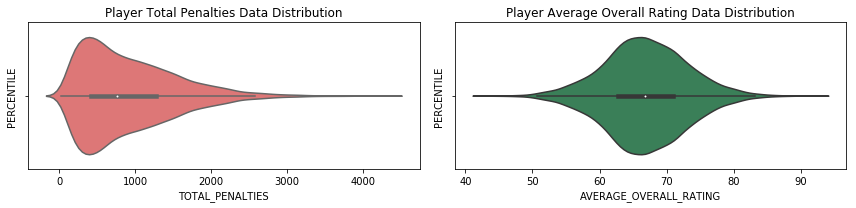

In [19]:
#Let's use violin plots to examine the players' data distribution for total penalties and 
#overall rating averaged over 2008-2016 period.
violinplt,ax1 = plt.subplots(nrows = 1,ncols = 2)
violinplt.set_size_inches(w=12,h=3)
sns.violinplot(x=df_players_penalty_stats['TOTAL_PENALTIES'],ax = ax1[0],palette=['#EE6666'])
ax1[0].set(ylabel = 'PERCENTILE',title = 'Player Total Penalties Data Distribution')
sns.violinplot(x=df_players_penalty_stats['AVERAGE_OVERALL_RATING'],ax= ax1[1],palette=["seagreen"])
ax1[1].set(ylabel = 'PERCENTILE',title = 'Player Average Overall Rating Data Distribution')
violinplt.tight_layout()


<div class="alert alert-block alert-info">
<b>Findings:</b> 
The plots above show data distribtion of players cumulative penalties and average overall ratings. 
The penalties data seems right skewed and overall ratings data seems to be normally distributed.
This plot make sense as only some players tend to get penalties often. 
As for the overall ratings, on average most player performace seems to be average!
</div>

<a id='Q3'> </a>
### Research Question 3 : What team attributes lead to most victories?

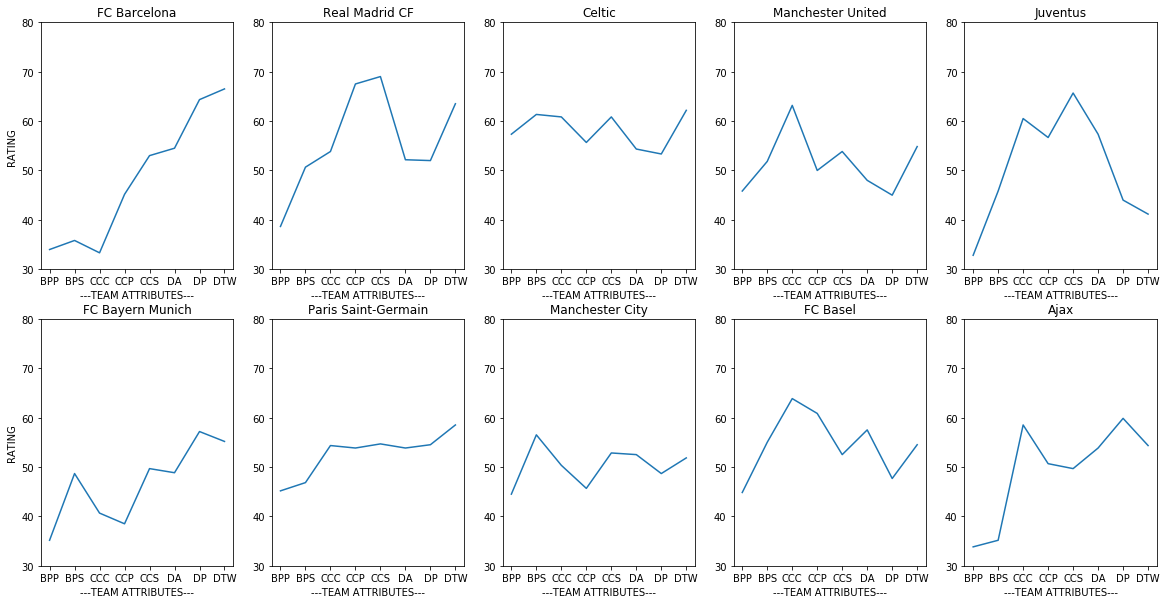

In [20]:
#sort data for top 10 winning teams and plot attribute data
top_team_df = df_team_attri_win_new.sort_values(by=['TOTAL_WIN_COUNT'],ascending=False)
top_teams = top_team_df.head(10)
x_val = ['BPP','BPS','CCC','CCP','CCS','DA','DP','DTW']
y_val = []
sub_plt_no = 1
plt.figure(figsize=(20,10))
for index,team in top_teams.iterrows():
    y_val = team[2:-1]   
    ax2 = plt.subplot(2,5,sub_plt_no)
    ax2.set(xlabel='---TEAM ATTRIBUTES---')
    ax2.set_ylim(30,80)
    plt.plot(x_val, y_val)
    if sub_plt_no == 1 or sub_plt_no == 6:
        ax2.set(ylabel='RATING')
    plt.title(team['TEAM_FULL_NAME'])
    sub_plt_no += 1
    
plt.show()


<div class="alert alert-block alert-info">
<b>Findings:</b> 
Above are plots of individual team attribute name vs. team attribute score for each of the top ten most victorious teams. This analysis is performed to see if a single attribute is a strong predictor of most victories. No single dimension jumps out. DTW-Defense Team Width seems to be of highest rating for 3 out of ten most victorious but that is not good enough for any correlations.
</div>

<a id='Q5'> </a>
### Research Question : How has goal difference changed over time?

In [21]:
#Calculate absolute goal difference and inspect dataframe 
df_match_goals_country['GOAL_DIFF'] = abs((df_match_goals_country['HOME_TEAM_GOAL'] - df_match_goals_country['AWAY_TEAM_GOAL']))
df_match_new = df_match_goals_country
df_match_new.head()

,COUNTRY_NAME,YEAR_OF_MATCH,HOME_TEAM_GOAL,AWAY_TEAM_GOAL,GOAL_DIFF
0,Belgium,2008,1,1,0
1,Belgium,2008,0,0,0
2,Belgium,2008,0,3,3
3,Belgium,2008,5,0,5
4,Belgium,2008,1,3,2


In [22]:
#Find how much data available for each country
df_match_new.groupby(['COUNTRY_NAME']).count()#calculating no. of records for each column,since all country have equal no. of records for all columns we can say that there is no missing data 

,YEAR_OF_MATCH,HOME_TEAM_GOAL,AWAY_TEAM_GOAL,GOAL_DIFF
COUNTRY_NAME,,,,
Belgium,1728,1728,1728,1728
England,3040,3040,3040,3040
France,3040,3040,3040,3040
Germany,2448,2448,2448,2448
Italy,3017,3017,3017,3017
Netherlands,2448,2448,2448,2448
Poland,1920,1920,1920,1920
Portugal,2052,2052,2052,2052
Scotland,1824,1824,1824,1824


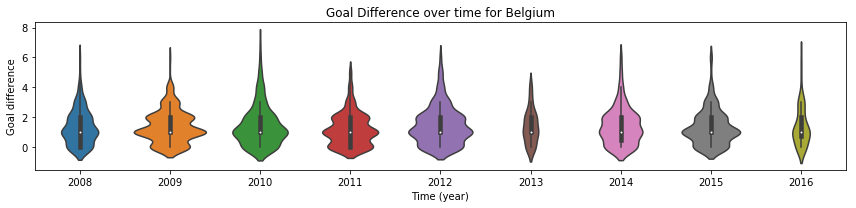

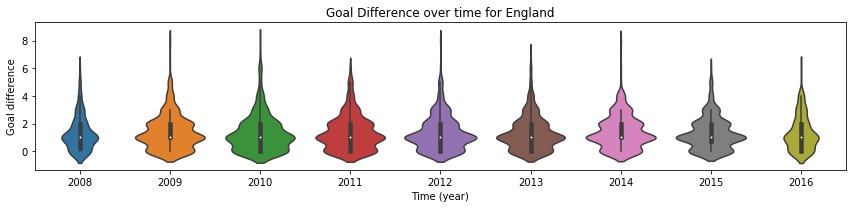

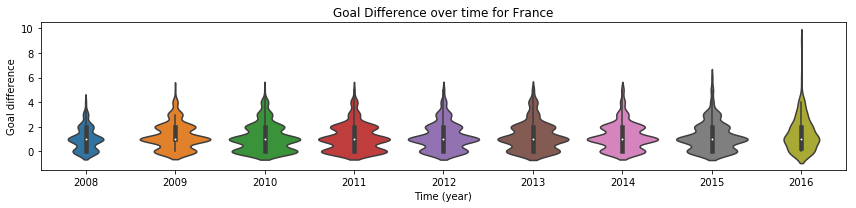

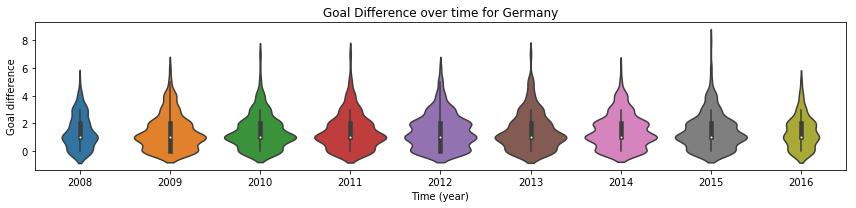

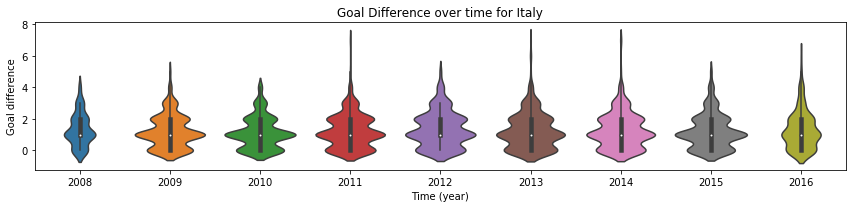

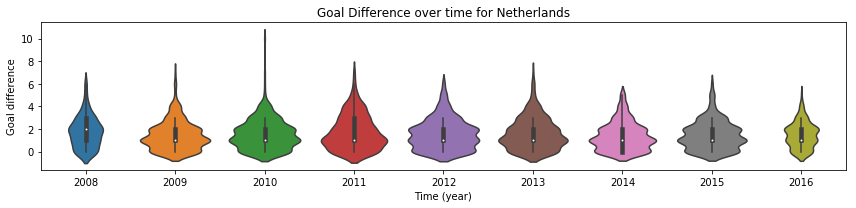

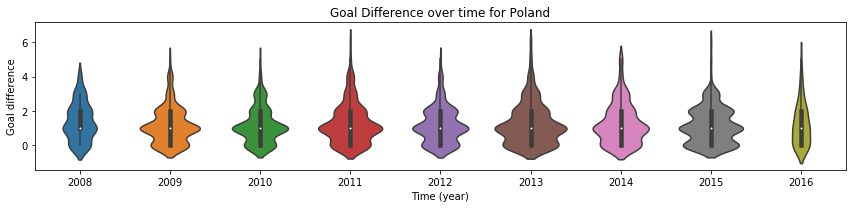

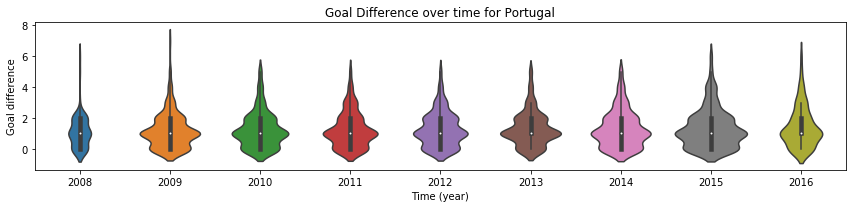

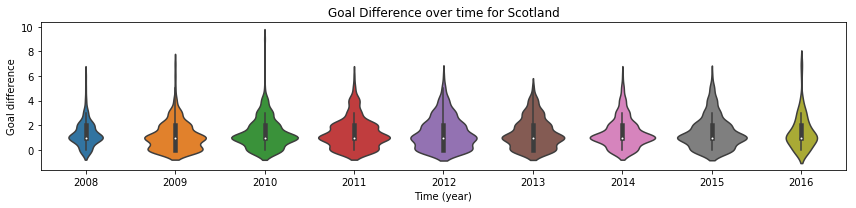

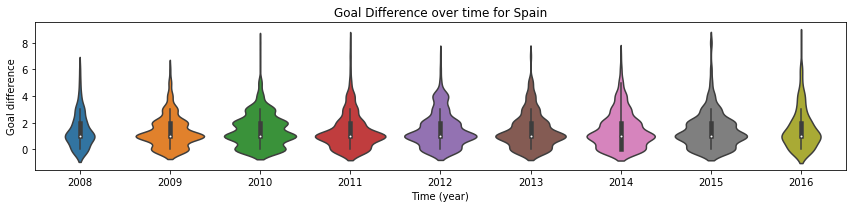

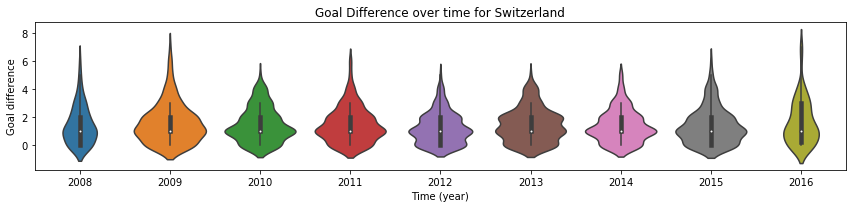

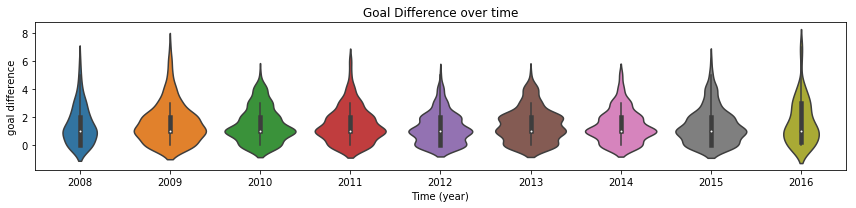

In [23]:
#Let's use violin plots to examine goal_diff vs time per country

for country in df_match_new['COUNTRY_NAME'].unique():
    df = df_match_new.query('COUNTRY_NAME == @country')
    plt_title = 'Goal Difference over time for ' + country
    fig,ax3 = plt.subplots(nrows = 1,ncols = 1)
    fig.set_size_inches(w=12,h=3)
    sns.violinplot(x=df['YEAR_OF_MATCH'],y=df['GOAL_DIFF'],scale = 'count')
    ax3.set(xlabel = 'Time (year)',ylabel = 'Goal difference',title = plt_title ) 
    fig.tight_layout()


fig,ax3 = plt.subplots(nrows = 1,ncols = 1)
fig.set_size_inches(w=12,h=3)
sns.violinplot(x=df['YEAR_OF_MATCH'],y=df['GOAL_DIFF'],scale = 'count')
ax3.set(xlabel = 'Time (year)',ylabel = 'goal difference',title = 'Goal Difference over time' ) 
fig.tight_layout()

<div class="alert alert-block alert-info">
<b>Findings:</b>The plots above show Goal difference over time for each country and entire dataset. Interestlingly, there is less data available for 2008 and 2016 than other years. Most data seems to fall between 0-3 goal difference over time period.
</div>

<a id='Q6'> </a>
### Research Question: How does Age of players correlate with Stamina, Reactions, Agility, Sprint Speed & Acceleration??

In [24]:
# While preparing the data and moving to calculate age I learned that dates are strings, which are hard to work with. 
# We need to convert them to datetime..
birthday = df_correlation_factors['BIRTHDAY'].astype('datetime64[ns]')
measurment_date = df_correlation_factors['DATE'].astype('datetime64[ns]')
#.. and finally calculate the age.
p_age = (measurment_date - birthday).astype('timedelta64[D]')/365.25 
#I could have used [Y] in order to get the data in years directly. However, it would outomatically truncate the decimals
# So in order not to lose accuracy I leave it in days and then divide.
df_correlation_factors['AGE'] = p_age
df_correlation_factors.head(15)

,index,DATE,BIRTHDAY,PLAYER_API_ID,PLAYER_NAME,AVERAGE_REACTIONS,AVERAGE_STAMINA,AVERAGE_ACCELERATION,AVERAGE_SPRINT_SPEED,AVERAGE_AGILITY,AGE
0,0,2007-02-22 00:00:00,1992-02-29 00:00:00,505942,Aaron Appindangoye,60.139344,63.297224,65.654218,66.045574,63.591098,14.981520
1,1,2007-08-30 00:00:00,1982-05-08 00:00:00,30572,Aaron Galindo,64.394428,67.975363,66.830762,67.340778,65.114066,25.311431
2,2,2008-02-22 00:00:00,1978-02-26 00:00:00,40005,Abdoulaye Faye,63.635697,67.484108,68.061125,68.897311,65.410853,29.987680
3,3,2008-08-30 00:00:00,1989-12-15 00:00:00,155782,Aaron Cresswell,64.532764,66.883052,66.990161,67.437535,65.002005,18.707734
4,8,2011-02-22 00:00:00,1991-05-13 00:00:00,162549,Aaron Doran,66.608664,67.772394,68.215859,68.957783,65.288363,19.780972
5,14,2013-03-01 00:00:00,1987-10-28 00:00:00,101042,Aaron Meijers,65.993573,68.403599,68.268638,68.543702,66.329049,25.341547
6,15,2013-03-04 00:00:00,1984-03-03 00:00:00,33762,Angel Javier Arizmendi,61.566667,64.633333,60.700000,61.833333,59.333333,29.002053
7,19,2013-03-28 00:00:00,1989-06-19 00:00:00,167027,Abdelaziz Barrada,65.836625,67.371634,68.710952,69.008977,67.053860,23.772758
8,21,2013-04-12 00:00:00,1988-01-17 00:00:00,41093,Abdou Traore,67.059218,61.810056,63.929609,64.326257,63.251397,25.234771
9,26,2013-05-17 00:00:00,1988-10-25 00:00:00,67334,Abdoul Karim Yoda,67.703549,67.882046,67.844468,67.967641,66.504175,24.558522


<div class="alert alert-block alert-warning">
<b>End of data preparation. We went through a cleaning phase and lastly we calculated a new field.</b>
</div>

Text(0.5,1,'Correlation Matrix Between Age And Various Attributes')

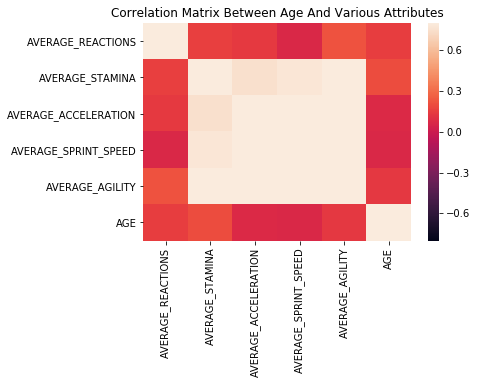

In [25]:
#Ploting Heatmap to find  Correlation between Age and Various attributes
# here ,we are dropping 'index', 'PLAYER_API_ID' columns as these doesn't serve our purpose of analysis.
columns = ['index', 'PLAYER_API_ID']
df_correlation_factors=df_correlation_factors.drop(columns,axis=1)

corr = df_correlation_factors.corr()
mapplt = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,vmin=-0.8 ,vmax=0.8)
mapplt.set_title("Correlation Matrix Between Age And Various Attributes")


<div class="alert alert-block alert-info">
<b>Findings:</b> This Correlation matrix helps us find out how age & other different attributes are linked to each other. We can clearly see that Age has a negative correlation with average acceleration,average agility, average stamina and average sprint speed of the players whereas age shows a  strong positive correlation with the average reactions of the players. 
</div>

<a id='Q7'> </a>
### Research Question : 
### How players attributes such as Overall Rating ,Dribbling ,Short Passing,Long Passing,Ball Control ,Potential are related?


Text(0.5,1,'Overall vs Potential')

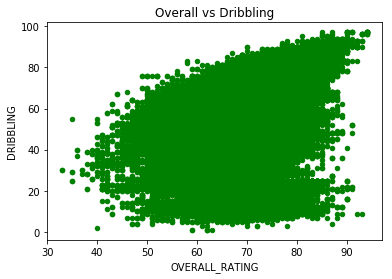

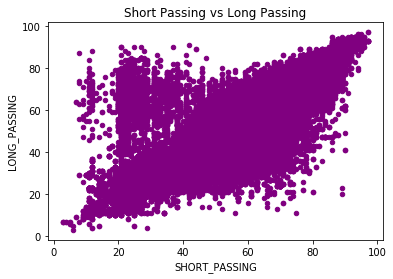

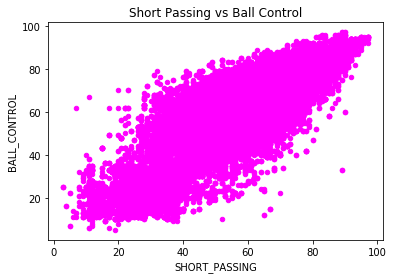

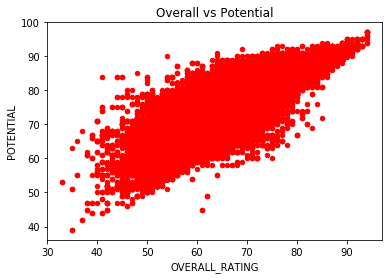

In [26]:
ax = df_overall_vs_relattributes.plot(x="OVERALL_RATING",y="DRIBBLING",kind="scatter",color = 'green')
ax.set_title("Overall vs Dribbling")

ax = df_overall_vs_relattributes.plot(x="SHORT_PASSING",y="LONG_PASSING",kind="scatter",color = 'purple')
ax.set_title("Short Passing vs Long Passing")

ax = df_overall_vs_relattributes.plot(x="SHORT_PASSING",y="BALL_CONTROL",kind="scatter",color = 'magenta')
ax.set_title("Short Passing vs Ball Control")

ax = df_overall_vs_relattributes.plot(x="OVERALL_RATING",y="POTENTIAL",kind="scatter", color = 'red')
ax.set_title("Overall vs Potential")

<div class="alert alert-block alert-info">
<b>Findings:</b> 
In this section I have displayed various scatter plots between attributes that I thought might have links with each other. In terms of prediction analysis later we might infer that ball control and short passing form a good fit.

Players with higher overall ratings are not always the players who can dribble well and this is true as several high rated players are defenders and goalkeepers whose strong suit is not dribbling.

Surprisingly, there are a lot of players who despite having high Long Passing scores have low Short Passing scores and this is a very interesting point.
</div>

<a id='Q8'> </a>
### Research Question: Which foot is the most preferred foot among the players?

,PREFERRED_FOOT,NUMBER_OF_PLAYERS
1,left,44733
2,right,138409


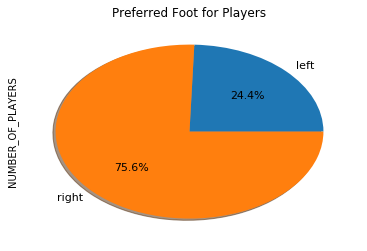

In [27]:
#Plotting Pie Chart to Know the most Preferred Foot by players

ax = df_preferred_foot_players.plot(kind="pie",y='NUMBER_OF_PLAYERS', autopct='%1.1f%%',
 startangle=0, shadow=True, labels=df_preferred_foot_players['PREFERRED_FOOT'], legend = False, fontsize=11)


ax.set_title("Preferred Foot for Players")
df_preferred_foot_players

<div class="alert alert-block alert-info">
<b>Findings:</b> 
This tells us pretty clear that only about 1 player in 4 is left footed. Majority of players are right footed.
</div>

<a id='Q9'> </a>
### Research Question : Which league sees the highest numbers of goals per game on average? And how does the value change across seasons?

In [28]:
#Let's calculate the total goals scored in every match
df_match_league['TOTAL_GOALS'] = df_match_league['AWAY_TEAM_GOAL'] + df_match_league['HOME_TEAM_GOAL']
#Is there a better way to do this (maybe vectorized?) ? is my way still acceptable?
df_match_league.head()

,SEASON,HOME_TEAM_GOAL,AWAY_TEAM_GOAL,LEAGUE_NAME,MATCH_API_ID,TOTAL_GOALS
0,2008/2009,1,1,Belgium Jupiler League,492473,2
1,2008/2009,0,0,Belgium Jupiler League,492474,0
2,2008/2009,0,3,Belgium Jupiler League,492475,3
3,2008/2009,5,0,Belgium Jupiler League,492476,5
4,2008/2009,1,3,Belgium Jupiler League,492477,4


Now , I will start by calculating the average total goals scored per season, per league. Therefore I should start by grouping by name and season.

In [29]:
grouped_n_s = df_match_league.groupby(['LEAGUE_NAME','SEASON'])
#first I group by league name and season
#Next, I should aggregate the data in 'TOTAL_GOALS' calculating the mean.

#Just to be clear, were I in SQL, the query would have been Just to try this in python I didn't do this in SQL: 
# SELECT name, season, AVG(total_goals) FROM grouped_n_s GROUP BY name, season;

mean_grouped = grouped_n_s['TOTAL_GOALS'].agg(np.mean)
mean_grouped

LEAGUE_NAME               SEASON   
Belgium Jupiler League    2008/2009    2.794118
                          2009/2010    2.690476
                          2010/2011    2.645833
                          2011/2012    2.879167
                          2012/2013    2.929167
                          2013/2014    2.500000
                          2014/2015    2.783333
                          2015/2016    2.891667
England Premier League    2008/2009    2.478947
                          2009/2010    2.771053
                          2010/2011    2.797368
                          2011/2012    2.805263
                          2012/2013    2.797368
                          2013/2014    2.768421
                          2014/2015    2.565789
                          2015/2016    2.700000
France Ligue 1            2008/2009    2.257895
                          2009/2010    2.410526
                          2010/2011    2.342105
                          2011/2012    2.515789
    

<b>The problem with this data now, is that it's in a Series form, it's no longer a Dataframe. I will have to bring it back to a df form now. I sense there might be a more efficient way to proceed through this phase, but I am not aware of it as of now.Kindly suggest in review.</b>

In [30]:
df_lg_ss_gol = mean_grouped.to_frame().reset_index()
df_lg_ss_gol.head()

,LEAGUE_NAME,SEASON,TOTAL_GOALS
0,Belgium Jupiler League,2008/2009,2.794118
1,Belgium Jupiler League,2009/2010,2.690476
2,Belgium Jupiler League,2010/2011,2.645833
3,Belgium Jupiler League,2011/2012,2.879167
4,Belgium Jupiler League,2012/2013,2.929167


Now it's time to vizualize the data. An histogram or scatter plot would not be the best choice in my opinion. Here we need a figure that shows how the average total goals changed over time as trendlines might emerge. Therefore, a Point plot appears to be the best choice.

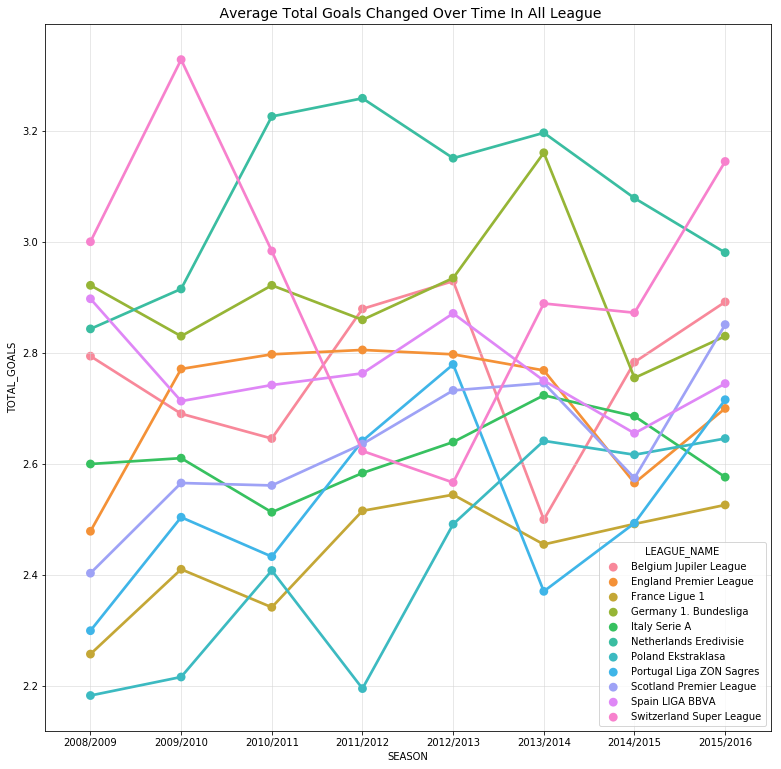

In [32]:
plt.figure(figsize=(13,13))
plt.title(' Average Total Goals Changed Over Time In All League',fontsize=14)
ax = sns.pointplot(x='SEASON', y='TOTAL_GOALS', hue='LEAGUE_NAME',data=df_lg_ss_gol)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

If the graph is too crowded, I can narrow down the leagues I want to compare.

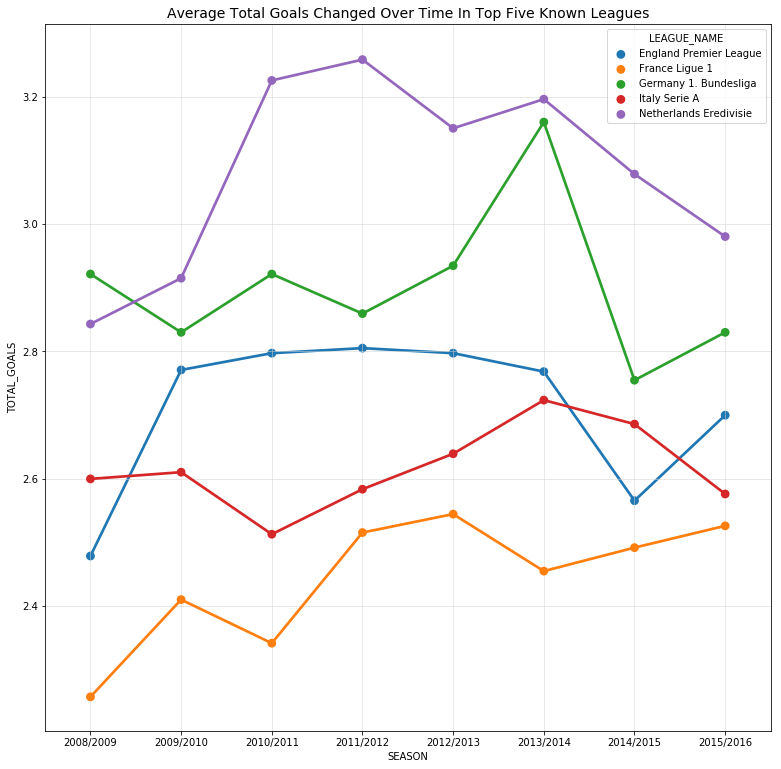

In [34]:
league_list = ['Netherlands Eredivisie', 'England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A']
selected = df_lg_ss_gol[df_lg_ss_gol.LEAGUE_NAME.isin(league_list)]

plt.figure(figsize=(13,13))
plt.title('Average Total Goals Changed Over Time In Top Five Known Leagues',fontsize=14)
ax = sns.pointplot(x='SEASON', y='TOTAL_GOALS', hue='LEAGUE_NAME',data=selected)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

<div class="alert alert-block alert-info"><b>Findings:</b>
It is interesting to see that on average the Netherlands Eredivisie soccer has bean quite consistent in having more goals per game than the others. Some leagues, such as the Switzerland Super league one, see a lot of variance overtime, with two peaks above all other leagues and a big valley. In other cases, such as the Italy Serie A one, there is consistency along the years around the same number of goals scored per game.
</div>

<a id='conclusions'></a>
## Conclusions

The objective of this analysis was to use SQL and Python to analyze the soccer dataset downloaded from kaggle. The dataset is normalized, self-explanatory and extensive. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. The dataset is stored in SQLite database. Upon downloading the DB Browser and dataset, I examined relationships between different tables. The SQLite queries are listed in the Data Wrangling section.

A basic analysis of various available data on European Soccer matches was done here. Some takeaways are:
<div class="alert alert-block alert-success">
<b>

1) I chose to calculate total number of penalties given for each player to find the players with most penalties. The data showed that most penalties given to Alessio Cerci, who is a forward for Italian National team. This is not conclusive but noteworthy that the forwards are taught to be selfish and aggressive at putting the ball in the net. This trait may result in penalties.
<br>
2) Next I chose to calculate average overall score per player for the entire time period. I think this is the best way to find the best overall player for 2008-2016 period. Messi followed closely by Ronaldo are the best overall players. This outcome is concurrent with the fifa information.
<br>
3) Next I chose to assess the team attribute data to find the traits that lead to most victorious teams. I first calculated total wins for each team and then merged it with average team attributes data for teams using SQLite. Next python was used to sort the data in descending order for total wins and plot top ten most victorious teams. First look at the plots there is no obvious one trait however, a careful examination shows the Defense Team Width and Chance Creation Shooting are top two consistent traits correlated to victory. This is probably a good correlation as the game of soccer has evolved, defensive play has become just as important as scoring. Wide team width helps with making it difficult for the opposition to pull them out of shape and hence less chance to score. The higher chance creation shooting indicates higher opportunities created for shooting.higher opportunities lead to higher probability to score.
<br>
4) Next,2D analysis was for how goal difference changes over time. There were discrepancies in amounts of data available for each country, so I decided to look at each country differently, and then all data. Most data seems to fall between 0-3 goal difference over time period.
<br>
5) Next, 2d Analysis was in terms of Player Data, there is a strong Negative correlation of Age with attributes like Sprint Speed, Acceleration, Agility and Stamina whereas Reactions show a strong Positive correlation.
<br>
6) Next, I chose to do various attribute comparison in  relatable attributes we can see that the short pass and ball control attributes seem to have a nice fit which makes sense.
<br>
7) Next, I chose to know players used which foot to play sccocer ,we can see that majority of players are right-footed in their game and 1/4 0f players are left-footed.There were some outlier though which i chose to remove to get clearity.
<br>

8) At last, I chose to see the highest numbers of goals per game on average in league and how does the value change across seasons.Firstly, I calculated the total goals scored in every match.Then did a group by league name and season on Dataframe.Next, I aggregated the data in 'TOTAL_GOALS' calculating the mean.
</b>
</div>
<div class="alert alert-block alert-danger"><b>Limitations</b>

<li> Although we have seen that the Netherlands Eredivisie soccer has on average more goals scored per game per season, we cannot infer anything about the statistical significance of this phenomenon. In other words, without a p-value, we cannot say if this phenomenon was attributable to chance.</li><br>
<li>The seasons available were limited. Specifically, we had only 8 seasons to analyze, which is not sufficient to mark reliable trendlines, especially as some leagues showed a lot of volatility.</li><br>
<li> In general, in case we wanted to infer something about the future, or about the "typical" scoring pattern within a league, we would need to run statistical tests.</li><br> 
<li>No statistical test was run. For instance, we do not have calculated a p-value, which could have given us the statistical significance of above matrix correlation.</li><br>
<li>As mentioned, no calculation of r squared has been provided, therefore we have no precise idea of the strength of the matrix correlation we performed using heatmap.</li><br>
<li> As a generale rule, we know that correlation does not imply causation. For instance, it could be that age does not affect sprint speed per see but rather, players engage in specific trainings focused on speed during the earlier phases of their career.</li><br>
<li>There are other variables that could have been useful in the analysis that we did not take in consideration: one example is  players 'vision' , 'gk_reflexes' & the age.</li><br>
</b>

</div>

<a id='Acknowledgement'> </a>
### Hat Tip Acknowledgement:
- __[Pandas Documentations](https://pandas.pydata.org/pandas-docs/stable/index.html)__
- __[Seaborn Documentations](https://seaborn.pydata.org/index.html)__
- __[Kaggle Discussion Forum](https://www.kaggle.com/hugomathien/soccer/discussion)__

- __[Stackoverflow: Converting a Pandas GroupBy object to DataFrame](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe)__

- __[Stackoverflow:Python + dataframe : AttributeError: 'float' object has no attribute ''](https://stackoverflow.com/questions/52596419/python-dataframe-attributeerror-float-object-has-no-attribute-replace)__

- __[Stackoverflow:when subtracting date columns in pandas and dividing the result by np.timedelta6](https://stackoverflow.com/questions/37859151/when-subtracting-date-columns-in-pandas-and-dividing-the-result-by-np-timedelta6)__
- All my Udacity Bertelsmann cohorts on slack and forum. 
-  Other Googling Sources

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Soccer.ipynb'])

4294967295